In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/network_traffic_collected.csv')

<ipython-input-2-018c12205f96>:1: DtypeWarning: Columns (4,5,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/network_traffic_collected.csv')


In [ ]:
data =pd.DataFrame(data)

In [ ]:
data.head(10)

,time,src_ip,dst_ip,protocol,packet_length,tcp_src_port,tcp_dst_port,udp_src_port,udp_dst_port,ttl,...,dns_resp_name,icmp_type,icmp_code,http_method,ssl_handshake_type,ip_flags,ack_rtt,retransmission,lost_segment,time_delta
0,1.730985e+09,172.17.18.80,224.0.0.251,MDNS,103,NaN,NaN,5353.0,5353.0,255.0,...,_googlecast._tcp.local,NaN,NaN,NaN,NaN,NaN,0x02,NaN,NaN,NaN
1,1.730985e+09,0.0.0.0,255.255.255.255,DHCP,348,NaN,NaN,68.0,67.0,64.0,...,NaN,NaN,NaN,NaN,NaN,0x02,NaN,NaN,NaN,0.369502000
2,1.730985e+09,172.17.16.1,255.255.255.255,DHCP,345,NaN,NaN,67.0,68.0,128.0,...,NaN,NaN,NaN,NaN,NaN,0x00,NaN,NaN,NaN,0.000000000
3,1.730985e+09,172.17.17.67,239.255.255.250,SSDP,179,NaN,NaN,53962.0,1900.0,4.0,...,NaN,NaN,NaN,M-SEARCH,NaN,0x00,NaN,NaN,NaN,0.015783000
4,1.730985e+09,0.0.0.0,255.255.255.255,DHCP,344,NaN,NaN,68.0,67.0,64.0,...,NaN,NaN,NaN,NaN,NaN,0x02,NaN,NaN,NaN,0.002920000
5,1.730985e+09,NaN,NaN,IAP,60,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.056348000
6,1.730985e+09,NaN,NaN,IAP,60,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000000
7,1.730985e+09,0.0.0.0,255.255.255.255,DHCP,354,NaN,NaN,68.0,67.0,64.0,...,NaN,NaN,NaN,NaN,NaN,0x02,NaN,NaN,NaN,0.003512000
8,1.730985e+09,NaN,NaN,ARP,60,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.221018000
9,1.730985e+09,NaN,NaN,ARP,60,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.031697000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   time                100000 non-null  float64
 1   src_ip              97129 non-null   object 
 2   dst_ip              97129 non-null   object 
 3   protocol            100000 non-null  object 
 4   packet_length       100000 non-null  object 
 5   tcp_src_port        95546 non-null   object 
 6   tcp_dst_port        95546 non-null   float64
 7   udp_src_port        2046 non-null    float64
 8   udp_dst_port        2046 non-null    float64
 9   ttl                 97129 non-null   float64
 10  tcp_flags           95546 non-null   object 
 11  window_size         95546 non-null   float64
 12  dns_qry_name        947 non-null     object 
 13  dns_resp_name       779 non-null     object 
 14  icmp_type           692 non-null     object 
 15  icmp_code           594 non-null   

In [ ]:

print(data.isnull().sum())


time                      0
src_ip                 2871
dst_ip                 2871
protocol                  0
packet_length             0
tcp_src_port           4454
tcp_dst_port           4454
udp_src_port          97954
udp_dst_port          97954
ttl                    2871
tcp_flags              4454
window_size            4454
dns_qry_name          99053
dns_resp_name         99221
icmp_type             99308
icmp_code             99406
http_method           99462
ssl_handshake_type    98462
ip_flags               3088
ack_rtt               87872
retransmission        99387
lost_segment          99842
time_delta              756
dtype: int64


In [ ]:
data = data.drop(columns=['dns_qry_name', 'lost_segment','dns_resp_name','icmp_code','icmp_type','http_method','ssl_handshake_type','udp_src_port','udp_dst_port','ip_flags'])

In [ ]:
data.head()

,time,src_ip,dst_ip,protocol,packet_length,tcp_src_port,tcp_dst_port,ttl,tcp_flags,window_size,ack_rtt,retransmission,time_delta
0,1.730985e+09,172.17.18.80,224.0.0.251,MDNS,103,NaN,NaN,255.0,NaN,NaN,0x02,NaN,NaN
1,1.730985e+09,0.0.0.0,255.255.255.255,DHCP,348,NaN,NaN,64.0,NaN,NaN,NaN,NaN,0.369502000
2,1.730985e+09,172.17.16.1,255.255.255.255,DHCP,345,NaN,NaN,128.0,NaN,NaN,NaN,NaN,0.000000000
3,1.730985e+09,172.17.17.67,239.255.255.250,SSDP,179,NaN,NaN,4.0,NaN,NaN,NaN,NaN,0.015783000
4,1.730985e+09,0.0.0.0,255.255.255.255,DHCP,344,NaN,NaN,64.0,NaN,NaN,NaN,NaN,0.002920000


In [ ]:
print(data.isnull().sum())

time                  0
src_ip             2871
dst_ip             2871
protocol              0
packet_length         0
tcp_src_port       4454
tcp_dst_port       4454
ttl                2871
tcp_flags          4454
window_size        4454
ack_rtt           87872
retransmission    99387
time_delta          756
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   time            100000 non-null  float64
 1   src_ip          97129 non-null   object 
 2   dst_ip          97129 non-null   object 
 3   protocol        100000 non-null  object 
 4   packet_length   100000 non-null  object 
 5   tcp_src_port    95546 non-null   object 
 6   tcp_dst_port    95546 non-null   float64
 7   ttl             97129 non-null   float64
 8   tcp_flags       95546 non-null   object 
 9   window_size     95546 non-null   float64
 10  ack_rtt         12128 non-null   object 
 11  retransmission  613 non-null     object 
 12  time_delta      99244 non-null   object 
dtypes: float64(4), object(9)
memory usage: 9.9+ MB


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
data = data.dropna(subset=['src_ip', 'dst_ip'])

In [ ]:
data['ack_rtt'] = pd.to_numeric(data['ack_rtt'], errors='coerce')
data['ttl'] = pd.to_numeric(data['ttl'], errors='coerce')

In [ ]:
data['tcp_src_port'] = pd.to_numeric(data['tcp_src_port'], errors='coerce')
data['tcp_dst_port'] = pd.to_numeric(data['tcp_dst_port'], errors='coerce')
data['window_size'] = pd.to_numeric(data['window_size'], errors='coerce')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97129 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            97129 non-null  float64
 1   src_ip          97129 non-null  object 
 2   dst_ip          97129 non-null  object 
 3   protocol        97129 non-null  object 
 4   packet_length   97129 non-null  object 
 5   tcp_src_port    95530 non-null  float64
 6   tcp_dst_port    95546 non-null  float64
 7   ttl             97129 non-null  float64
 8   tcp_flags       95546 non-null  object 
 9   window_size     95546 non-null  float64
 10  ack_rtt         11779 non-null  float64
 11  retransmission  613 non-null    object 
 12  time_delta      96671 non-null  object 
dtypes: float64(6), object(7)
memory usage: 10.4+ MB


In [ ]:
median_imputer = SimpleImputer(strategy='median')
data[['ack_rtt', 'ttl']] = median_imputer.fit_transform(data[['ack_rtt', 'ttl']])

In [ ]:
import ipaddress

def ip_to_int(ip):
    try:
        return int(ipaddress.ip_address(ip))
    except ValueError:
        return np.nan

data['src_ip'] = data['src_ip'].apply(ip_to_int)
data['dst_ip'] = data['dst_ip'].apply(ip_to_int)


In [ ]:
data = data[(data['src_ip'] != 0) & (data['dst_ip'] != 0)].dropna(subset=['src_ip', 'dst_ip']).reset_index(drop=True)

In [ ]:
mode_imputer = SimpleImputer(strategy='most_frequent')
data[['tcp_src_port', 'tcp_dst_port', 'window_size']] = mode_imputer.fit_transform(
    data[['tcp_src_port', 'tcp_dst_port', 'window_size']]
)

In [ ]:
unique_count = data['tcp_flags'].nunique()


unique_values = data['tcp_flags'].unique()
print(f"Unique tcp_flags values: {unique_values}")

Unique tcp_flags values: [nan '0x0011' '0x0018' '0x0010' '0x0002' '0x0012' '0x0004' '0x0014' '53'
 '0x0019']


In [ ]:

data['tcp_flags'] = data['tcp_flags'].apply(lambda x: int(x, 16) if isinstance(x, str) else x)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97068 entries, 0 to 97067
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            97068 non-null  float64
 1   src_ip          97068 non-null  int64  
 2   dst_ip          97068 non-null  int64  
 3   protocol        97068 non-null  object 
 4   packet_length   97068 non-null  object 
 5   tcp_src_port    97068 non-null  float64
 6   tcp_dst_port    97068 non-null  float64
 7   ttl             97068 non-null  float64
 8   tcp_flags       95546 non-null  float64
 9   window_size     97068 non-null  float64
 10  ack_rtt         97068 non-null  float64
 11  retransmission  613 non-null    object 
 12  time_delta      96610 non-null  object 
dtypes: float64(7), int64(2), object(4)
memory usage: 9.6+ MB


In [ ]:
data['time_delta'] = pd.to_numeric(data['time_delta'], errors='coerce')

In [ ]:
data['packet_length'] = pd.to_numeric(data['packet_length'], errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97068 entries, 0 to 97067
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            97068 non-null  float64
 1   src_ip          97068 non-null  int64  
 2   dst_ip          97068 non-null  int64  
 3   protocol        97068 non-null  object 
 4   packet_length   97052 non-null  float64
 5   tcp_src_port    97068 non-null  float64
 6   tcp_dst_port    97068 non-null  float64
 7   ttl             97068 non-null  float64
 8   tcp_flags       95546 non-null  float64
 9   window_size     97068 non-null  float64
 10  ack_rtt         97068 non-null  float64
 11  retransmission  613 non-null    object 
 12  time_delta      96562 non-null  float64
dtypes: float64(9), int64(2), object(2)
memory usage: 9.6+ MB


In [ ]:
data['retransmission'] = pd.to_numeric(data['retransmission'], errors='coerce')
data['retransmission'] = data['retransmission'].notnull().astype(int)

In [ ]:
data['packet_length'].fillna(data['packet_length'].median(), inplace=True)
data['tcp_flags'].fillna(data['tcp_flags'].median(), inplace=True)
data['time_delta'].fillna(data['time_delta'].median(), inplace=True)

<ipython-input-27-a6520693a6b8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['packet_length'].fillna(data['packet_length'].median(), inplace=True)
<ipython-input-27-a6520693a6b8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97068 entries, 0 to 97067
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            97068 non-null  float64
 1   src_ip          97068 non-null  int64  
 2   dst_ip          97068 non-null  int64  
 3   protocol        97068 non-null  object 
 4   packet_length   97068 non-null  float64
 5   tcp_src_port    97068 non-null  float64
 6   tcp_dst_port    97068 non-null  float64
 7   ttl             97068 non-null  float64
 8   tcp_flags       97068 non-null  float64
 9   window_size     97068 non-null  float64
 10  ack_rtt         97068 non-null  float64
 11  retransmission  97068 non-null  int64  
 12  time_delta      97068 non-null  float64
dtypes: float64(9), int64(3), object(1)
memory usage: 9.6+ MB


In [ ]:
avg_latency = data.groupby(['src_ip', 'dst_ip'])['time_delta'].mean()
jitter = data.groupby(['src_ip', 'dst_ip'])['time_delta'].std()
total_data = data.groupby(['src_ip', 'dst_ip'])['packet_length'].sum()

session_duration = data.groupby(['src_ip', 'dst_ip'])['time'].apply(lambda x: x.max() - x.min())

bandwidth = total_data / session_duration



In [ ]:
print("Average Latency:")
print(avg_latency)

print("\nJitter:")
print(jitter)

print("\nTotal Data:")
print(total_data)

print("\nSession Duration:")
print(session_duration)

print("\nBandwidth:")
print(bandwidth)

Average Latency:
src_ip      dst_ip    
64134484    2886800497    0.012618
64952264    2886800497    0.084226
65798489    2886800497    0.022488
134743044   2886800497    0.005677
134744072   2886800497    0.004459
                            ...   
3232236280  2886800497    0.000000
3427780043  2886800497    0.003600
3427780077  2886800497    0.000677
3427780079  2886800497    0.004740
3639550644  2886800497    0.012465
Name: time_delta, Length: 314, dtype: float64

Jitter:
src_ip      dst_ip    
64134484    2886800497    0.023231
64952264    2886800497    0.108200
65798489    2886800497    0.042151
134743044   2886800497    0.008027
134744072   2886800497    0.007194
                            ...   
3232236280  2886800497    0.000000
3427780043  2886800497    0.011816
3427780077  2886800497    0.002536
3427780079  2886800497    0.020097
3639550644  2886800497    0.038891
Name: time_delta, Length: 314, dtype: float64

Total Data:
src_ip      dst_ip    
64134484    2886800497      69

## It's time for some visualization

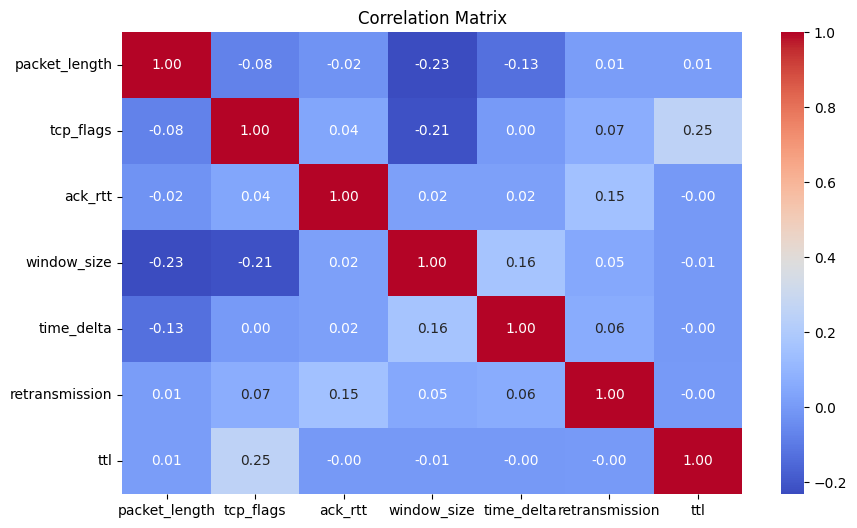

In [ ]:
corr_features = ['packet_length', 'tcp_flags', 'ack_rtt', 'window_size', 'time_delta', 'retransmission', 'ttl']
corr_matrix = data[corr_features].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# z_scores = (data3['time_delta'] - data3['time_delta'].mean()) / data3['time_delta'].std()

# threshold = 3


# outliers = data3[np.abs(z_scores) > threshold]


# data3 = data3[~data3.index.isin(outliers.index)]

In [ ]:
# avg_latency = data3.groupby(['src_ip', 'dst_ip'])['time_delta'].mean().reset_index()

# avg_latency.rename(columns={'time_delta': 'avg_latency'}, inplace=True)


# data3= pd.merge(data3, avg_latency, on=['src_ip', 'dst_ip'], how='left')

Box-plot

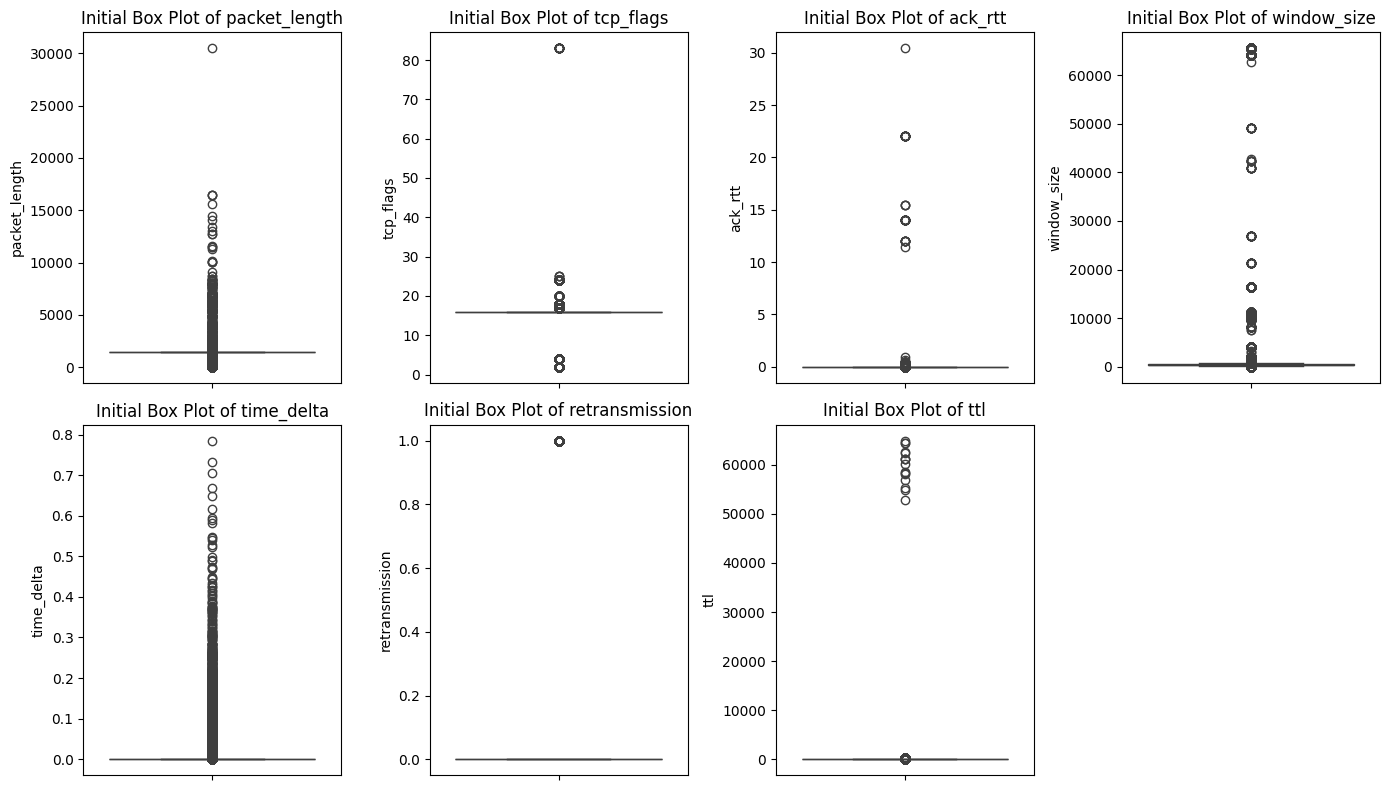

In [ ]:
corr_features = ['packet_length', 'tcp_flags', 'ack_rtt', 'window_size', 'time_delta', 'retransmission', 'ttl']
corr_features2 = ['packet_length', 'tcp_flags', 'ack_rtt', 'window_size', 'time_delta', 'ttl']
plt.figure(figsize=(14, 8))
for i, feature in enumerate(corr_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data[feature])
    plt.title(f'Initial Box Plot of {feature}')
plt.tight_layout()
plt.show()

outlier removal

In [ ]:
from scipy.stats import zscore
z_scores = np.abs(zscore(data[corr_features2]))
data = data[(z_scores < 3).all(axis=1)]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94503 entries, 0 to 97067
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            94503 non-null  float64
 1   src_ip          94503 non-null  int64  
 2   dst_ip          94503 non-null  int64  
 3   protocol        94503 non-null  object 
 4   packet_length   94503 non-null  float64
 5   tcp_src_port    94503 non-null  float64
 6   tcp_dst_port    94503 non-null  float64
 7   ttl             94503 non-null  float64
 8   tcp_flags       94503 non-null  float64
 9   window_size     94503 non-null  float64
 10  ack_rtt         94503 non-null  float64
 11  retransmission  94503 non-null  int64  
 12  time_delta      94503 non-null  float64
dtypes: float64(9), int64(3), object(1)
memory usage: 10.1+ MB


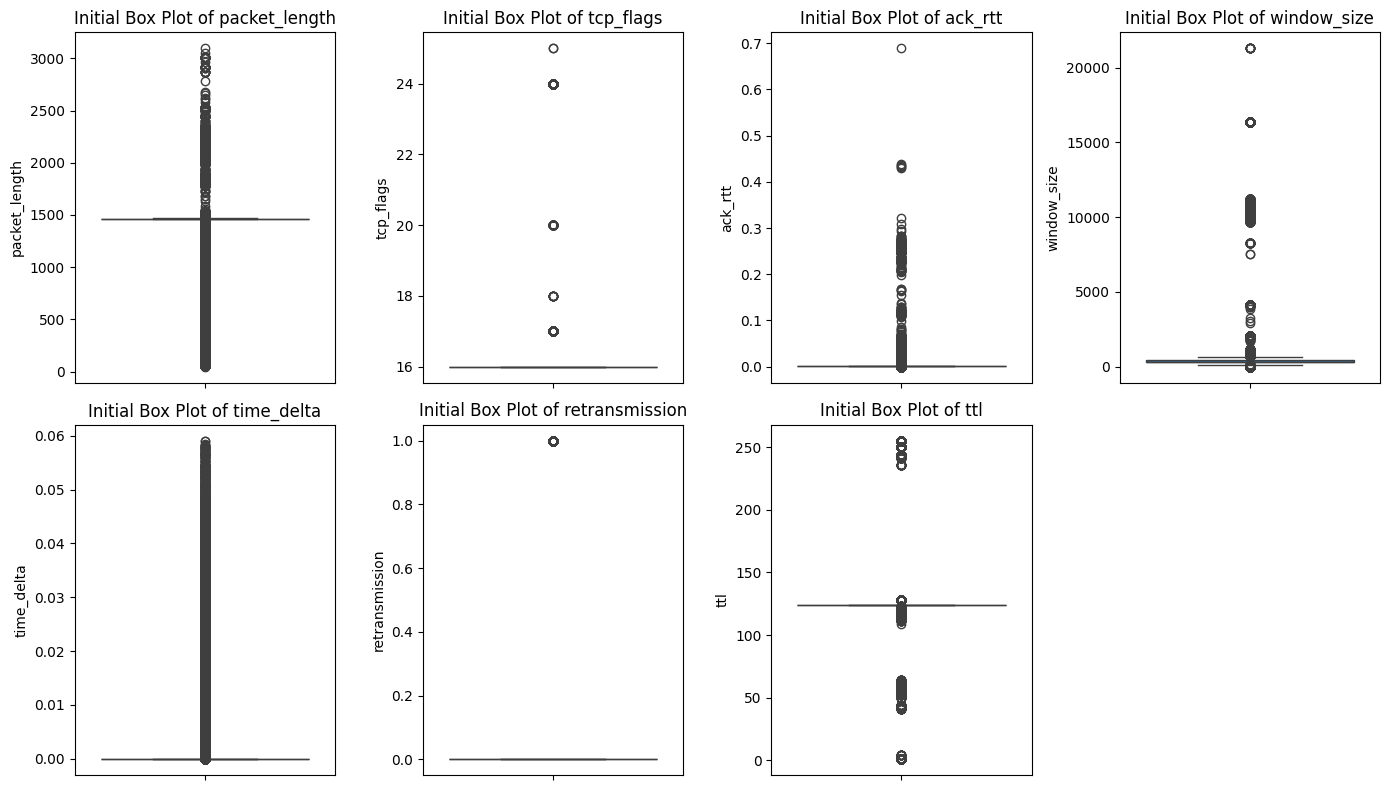

In [ ]:
corr_features = ['packet_length', 'tcp_flags', 'ack_rtt', 'window_size', 'time_delta', 'retransmission', 'ttl']
plt.figure(figsize=(14, 8))
for i, feature in enumerate(corr_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data[feature])
    plt.title(f'Initial Box Plot of {feature}')
plt.tight_layout()
plt.show()

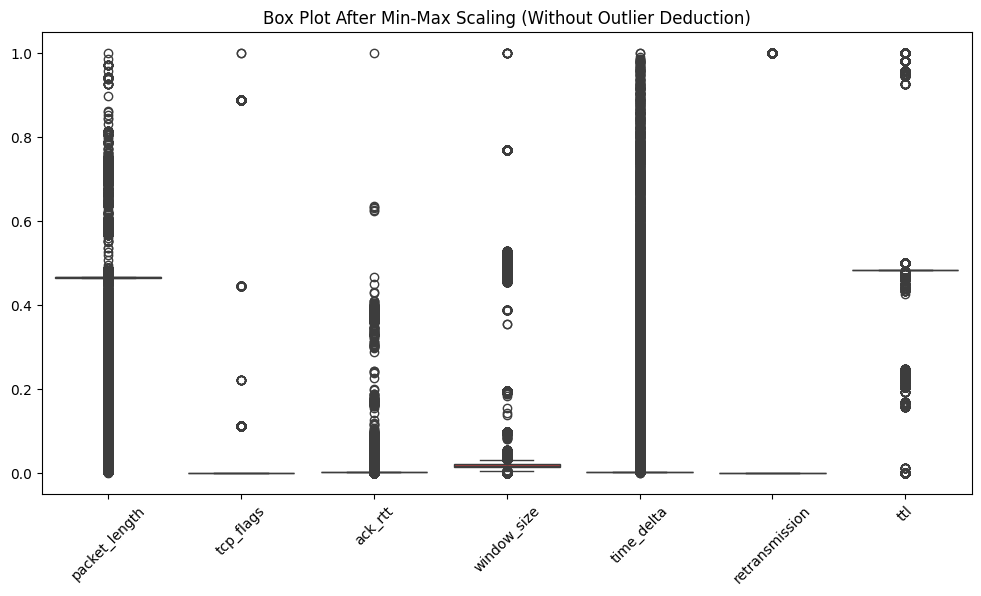

In [ ]:
from sklearn.preprocessing import MinMaxScaler


corr_features2 = ['packet_length', 'tcp_flags', 'ack_rtt', 'window_size', 'time_delta', 'ttl']

scaler = MinMaxScaler()


data[corr_features2] = scaler.fit_transform(data[corr_features2])

plt.figure(figsize=(12, 6))
sns.boxplot(data=data[corr_features])
plt.title("Box Plot After Min-Max Scaling (Without Outlier Deduction)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
data.columns

Index(['time', 'src_ip', 'dst_ip', 'protocol', 'packet_length', 'tcp_src_port',
       'tcp_dst_port', 'ttl', 'tcp_flags', 'window_size', 'ack_rtt',
       'retransmission', 'time_delta'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


ANOVA result for packet_length across protocols: F-statistic = nan, p-value = nan
Correlation matrix for continuous features:
                packet_length  tcp_src_port  tcp_dst_port       ttl  \
packet_length        1.000000     -0.604512      0.657849  0.167283   
tcp_src_port        -0.604512      1.000000     -0.934069  0.138155   
tcp_dst_port         0.657849     -0.934069      1.000000 -0.143743   
ttl                  0.167283      0.138155     -0.143743  1.000000   
window_size         -0.219752      0.015896     -0.023624 -0.203549   
ack_rtt             -0.203255     -0.025852      0.022292 -0.135298   
retransmission       0.028268      0.115454     -0.106446  0.018479   
time_delta          -0.237594      0.086438     -0.152280 -0.162240   

                window_size   ack_rtt  retransmission  time_delta  
packet_length     -0.219752 -0.203255        0.028268   -0.237594  
tcp_src_port       0.015896 -0.025852        0.115454    0.086438  
tcp_dst_port      -0.023624  0

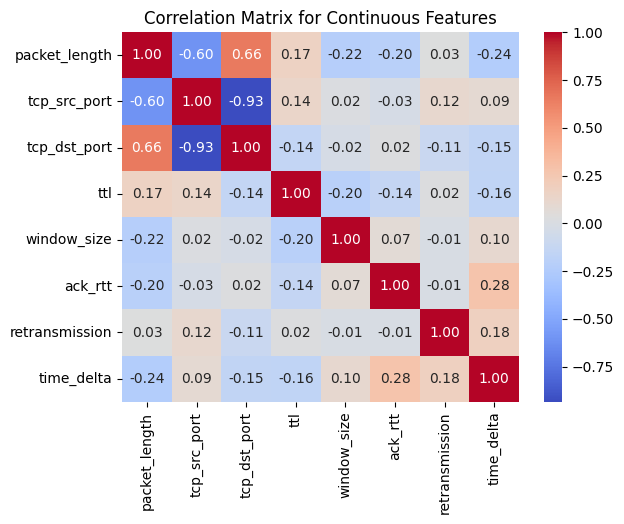

In [ ]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


df = data.copy()

# Encoding categorical variables for analysis if necessary
label_encoder = LabelEncoder()
df['protocol_encoded'] = label_encoder.fit_transform(df['protocol'])
df['tcp_flags_encoded'] = label_encoder.fit_transform(df['tcp_flags'])

# # Example Hypothesis Testing: T-Test for 'packet_length' based on binary outcome (e.g., 'is_attack')
# group_1 = df[df['is_attack'] == 0]['packet_length']  # Non-attack
# group_2 = df[df['is_attack'] == 1]['packet_length']  # Attack

# t_stat, p_val = stats.ttest_ind(group_1, group_2)
# print(f"T-Test result for packet_length: t-statistic = {t_stat}, p-value = {p_val}")

# ANOVA example for 'ack_rtt' across different 'protocol' categories
anova_result = stats.f_oneway(
    df[df['protocol'] == 'TCP']['packet_length'],
    df[df['protocol'] == 'UDP']['packet_length'],
    df[df['protocol'] == 'ICMP']['packet_length']
)
print(f"ANOVA result for packet_length across protocols: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

# Correlation Matrix for continuous features
continuous_features = ['packet_length', 'tcp_src_port', 'tcp_dst_port', 'ttl',
                       'window_size', 'ack_rtt', 'retransmission', 'time_delta']

corr_matrix = df[continuous_features].corr()
print("Correlation matrix for continuous features:")
print(corr_matrix)

# Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Continuous Features")
plt.show()


In [ ]:
protocol_counts = df['protocol'].value_counts()
print("Protocol counts:\n", protocol_counts)

Protocol counts:
 protocol
TCP        74049
TLSv1.3    16765
TLSv1.2     1836
MDNS         545
TLSv1        529
DNS          219
QUIC         154
SSDP         151
UDP          119
NBNS          77
HTTP          18
LLMNR         18
SSLv2         16
SSL            5
DHCP           1
WSP            1
Name: count, dtype: int64


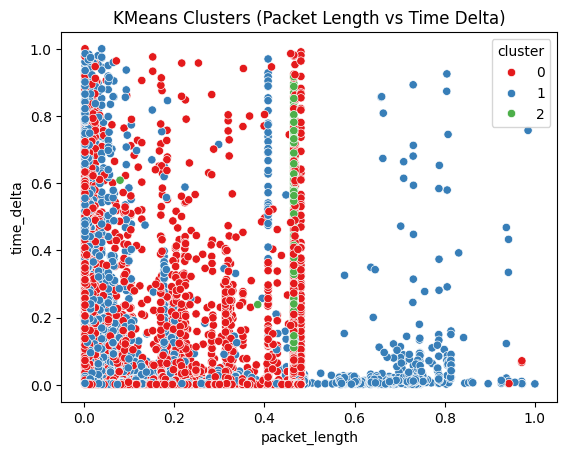

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


features = df[['packet_length', 'tcp_src_port', 'tcp_dst_port', 'ttl', 'window_size',
               'ack_rtt', 'retransmission', 'time_delta']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=0)  # Adjust n_clusters as needed
df['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters in 2D using selected features (e.g., packet_length vs. time_delta)
sns.scatterplot(x=df['packet_length'], y=df['time_delta'], hue=df['cluster'], palette="Set1")
plt.title("KMeans Clusters (Packet Length vs Time Delta)")
plt.show()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94503 entries, 0 to 97067
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            94503 non-null  float64
 1   src_ip          94503 non-null  int64  
 2   dst_ip          94503 non-null  int64  
 3   protocol        94503 non-null  object 
 4   packet_length   94503 non-null  float64
 5   tcp_src_port    94503 non-null  float64
 6   tcp_dst_port    94503 non-null  float64
 7   ttl             94503 non-null  float64
 8   tcp_flags       94503 non-null  float64
 9   window_size     94503 non-null  float64
 10  ack_rtt         94503 non-null  float64
 11  retransmission  94503 non-null  int64  
 12  time_delta      94503 non-null  float64
dtypes: float64(9), int64(3), object(1)
memory usage: 10.1+ MB


In [ ]:
avg_latency = data.groupby(['src_ip', 'dst_ip'])['time_delta'].mean().rename("avg_latency")
jitter = data.groupby(['src_ip', 'dst_ip'])['time_delta'].std().rename("jitter")
total_data = data.groupby(['src_ip', 'dst_ip'])['packet_length'].sum().rename("total_data")
session_duration = data.groupby(['src_ip', 'dst_ip'])['time'].apply(lambda x: x.max() - x.min()).rename("session_duration")


bandwidth = (total_data / session_duration.replace({0: pd.NA})).rename("bandwidth")


metrics_df = pd.concat([avg_latency, jitter, total_data, session_duration, bandwidth], axis=1).reset_index()

# Merge the metrics back to the original dataset
data = data.merge(metrics_df, on=['src_ip', 'dst_ip'], how='left')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94503 entries, 0 to 94502
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              94503 non-null  float64
 1   src_ip            94503 non-null  int64  
 2   dst_ip            94503 non-null  int64  
 3   protocol          94503 non-null  object 
 4   packet_length     94503 non-null  float64
 5   tcp_src_port      94503 non-null  float64
 6   tcp_dst_port      94503 non-null  float64
 7   ttl               94503 non-null  float64
 8   tcp_flags         94503 non-null  float64
 9   window_size       94503 non-null  float64
 10  ack_rtt           94503 non-null  float64
 11  retransmission    94503 non-null  int64  
 12  time_delta        94503 non-null  float64
 13  avg_latency       94503 non-null  float64
 14  jitter            94490 non-null  float64
 15  total_data        94503 non-null  float64
 16  session_duration  94503 non-null  float6

# It's Time for Model Building

In [ ]:
from sklearn.ensemble import IsolationForest
import pandas as pd

# Subset data for relevant features
X_spikes = data[['packet_length', 'ack_rtt', 'time_delta', 'ttl', 'retransmission']]

# Initialize Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Fit the model
data['spike_anomaly'] = iso_forest.fit_predict(X_spikes)

# Convert predictions (-1: anomaly, 1: normal) to labels (1: spike detected, 0: normal)
data['spike_anomaly'] = data['spike_anomaly'].apply(lambda x: 1 if x == -1 else 0)

print(data[['packet_length', 'ack_rtt', 'time_delta', 'ttl', 'retransmission', 'spike_anomaly']].head())


   packet_length   ack_rtt  time_delta       ttl  retransmission  \
0       0.018367  0.001196    0.001099  1.000000               0   
1       0.097737  0.001196    0.001099  0.500000               0   
2       0.043293  0.001196    0.268069  0.011811               0   
3       0.026238  0.001196    0.001099  1.000000               0   
4       0.026238  0.001196    0.001099  1.000000               0   

   spike_anomaly  
0              1  
1              0  
2              1  
3              1  
4              1  


In [ ]:
from google.colab import files

data.to_csv('filtered_data.csv', index=False)

files.download('filtered_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch [1/500], Loss: 0.0001
Epoch [2/500], Loss: 0.0001
Epoch [3/500], Loss: 0.0000
Epoch [4/500], Loss: 0.0030
Epoch [5/500], Loss: 0.0007
Epoch [6/500], Loss: 0.0002
Epoch [7/500], Loss: 0.0000
Epoch [8/500], Loss: 0.0000
Epoch [9/500], Loss: 0.0044
Epoch [10/500], Loss: 0.0001
Epoch [11/500], Loss: 0.0000
Epoch [12/500], Loss: 0.0000
Epoch [13/500], Loss: 0.0000
Epoch [14/500], Loss: 0.0001
Epoch [15/500], Loss: 0.0050
Epoch [16/500], Loss: 0.0045
Epoch [17/500], Loss: 0.0000
Epoch [18/500], Loss: 0.0001
Epoch [19/500], Loss: 0.0000
Epoch [20/500], Loss: 0.0000
Epoch [21/500], Loss: 0.0000
Epoch [22/500], Loss: 0.0002
Epoch [23/500], Loss: 0.0001
Epoch [24/500], Loss: 0.0000
Epoch [25/500], Loss: 0.0038
Epoch [26/500], Loss: 0.0043
Epoch [27/500], Loss: 0.0000
Epoch [28/500], Loss: 0.0001
Epoch [29/500], Loss: 0.0001
Epoch [30/500], Loss: 0.0002
Epoch [31/500], Loss: 0.0003
Epoch [32/500], Loss: 0.0001
Epoch [33/500], Loss: 0.0000
Epoch [34/500], Loss: 0.0001
Epoch [35/500], Loss: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 0.1710
R²: 0.7456


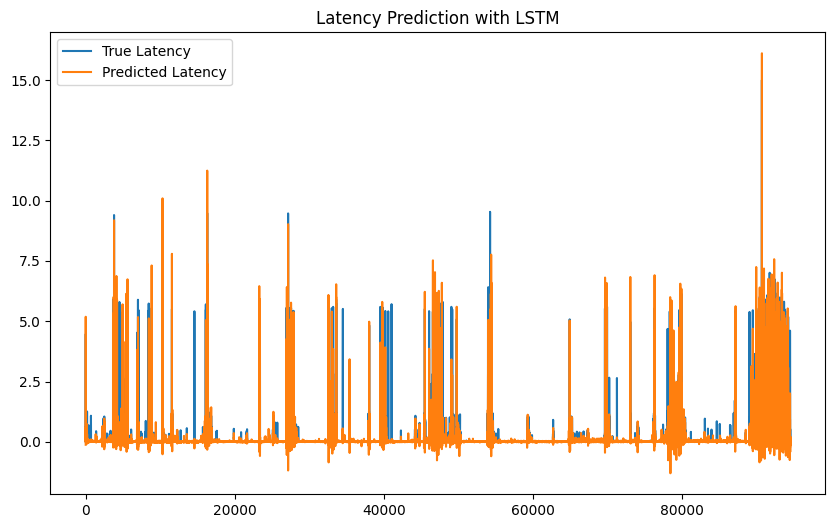

In [ ]:
# import torch
# import torch.nn as nn
# from torch.utils.data import DataLoader, TensorDataset
# from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np
# import matplotlib.pyplot as plt

# data['protocol'] = LabelEncoder().fit_transform(data['protocol'])
# scaler = MinMaxScaler()
# X_latency = data[['time', 'ack_rtt', 'packet_length', 'retransmission', 'protocol']]
# X_scaled = scaler.fit_transform(X_latency)


# window_size = 10
# X_lstm, y_lstm = [], []

# for i in range(window_size, len(X_scaled)):
#     X_lstm.append(X_scaled[i-window_size:i])
#     y_lstm.append(X_scaled[i][1])

# X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)
# X_lstm_tensor = torch.tensor(X_lstm, dtype=torch.float32)
# y_lstm_tensor = torch.tensor(y_lstm, dtype=torch.float32)


# dataset = TensorDataset(X_lstm_tensor, y_lstm_tensor)
# loader = DataLoader(dataset, batch_size=32, shuffle=True)

# class LSTMModel(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(LSTMModel, self).__init__()
#         self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
#         self.fc = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         _, (hn, _) = self.lstm(x)
#         out = self.fc(hn[-1])
#         return out

# model = LSTMModel(input_size=X_lstm.shape[2], hidden_size=50, output_size=1)
# criterion = nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


# num_epochs = 500
# for epoch in range(num_epochs):
#     for X_batch, y_batch in loader:
#         outputs = model(X_batch)
#         loss = criterion(outputs.squeeze(), y_batch)

#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#     print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


# model.eval()
# with torch.no_grad():
#     y_pred = model(X_lstm_tensor).squeeze().numpy()


# y_pred_rescaled = scaler.inverse_transform(np.concatenate(
#     (np.zeros((y_pred.shape[0], 4)), y_pred.reshape(-1, 1)), axis=1))[:, -1]
# y_true_rescaled = scaler.inverse_transform(np.concatenate(
#     (np.zeros((y_lstm.shape[0], 4)), y_lstm.reshape(-1, 1)), axis=1))[:, -1]


# rmse = mean_squared_error(y_true_rescaled, y_pred_rescaled, squared=False)
# r2 = r2_score(y_true_rescaled, y_pred_rescaled)

# print(f"RMSE: {rmse:.4f}")
# print(f"R²: {r2:.4f}")

# plt.figure(figsize=(10, 6))
# plt.plot(y_true_rescaled, label='True Latency')
# plt.plot(y_pred_rescaled, label='Predicted Latency')
# plt.legend()
# plt.title("Latency Prediction with LSTM")
# plt.show()


In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 8))

# # Plot for True Latency
# plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
# plt.plot(y_true_rescaled, label='True Latency', color='blue')
# plt.legend()
# plt.title("True Latency")

# # Plot for Predicted Latency
# plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
# plt.plot(y_pred_rescaled, label='Predicted Latency', color='orange')
# plt.legend()
# plt.title("Predicted Latency")

# # Display the plots
# plt.tight_layout()
# plt.show()


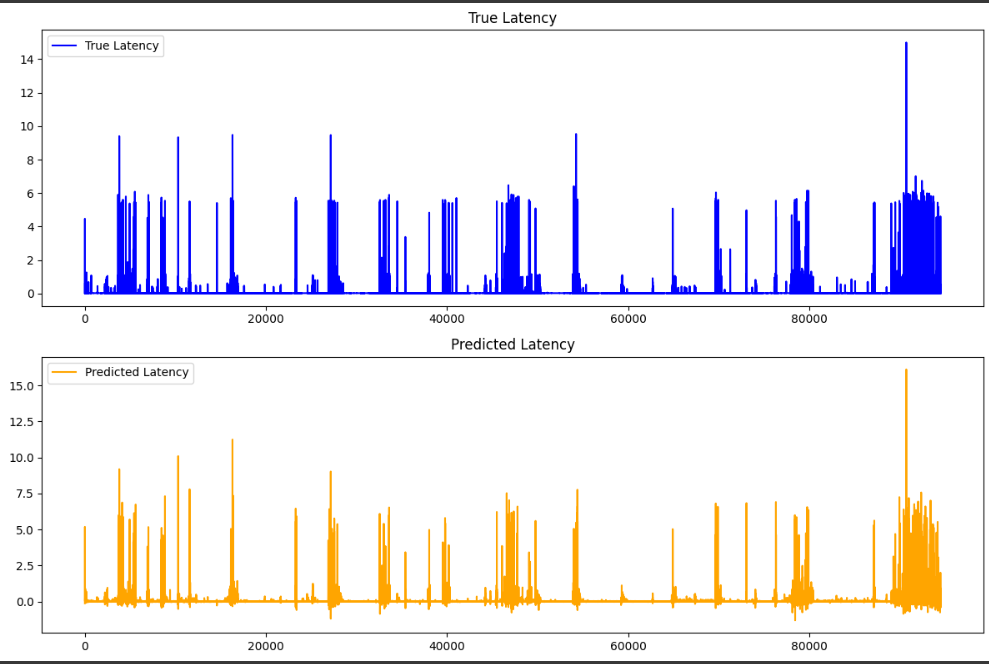

In [ ]:
# RMSE: 0.1710
# MAE: 0.0474
# R²: 0.7456

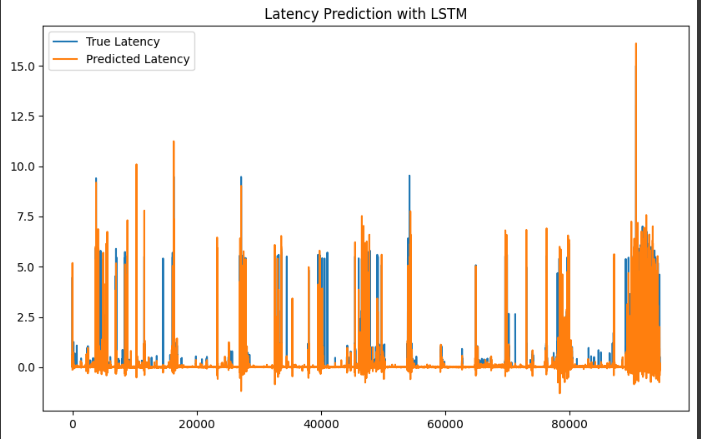

In [ ]:
# torch.save(model.state_dict(), 'lstm_model.pth')
# from google.colab import files
# files.download('lstm_model.pth')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# # Calculate RMSE, MAE, and R² directly on the continuous predictions
# rmse = mean_squared_error(y_true_rescaled, y_pred_rescaled, squared=False)
# mae = mean_absolute_error(y_true_rescaled, y_pred_rescaled)
# r2 = r2_score(y_true_rescaled, y_pred_rescaled)

# print(f"RMSE: {rmse:.4f}")
# print(f"MAE: {mae:.4f}")
# print(f"R²: {r2:.4f}")


In [ ]:
# # Print all parameters in the model
# for name, param in model.state_dict().items():
#     print(f"Parameter name: {name}")
#     print(f"Value: {param}")
#     print("-" * 50)


NameError: name 'y_true_rescaled' is not defined